In [1]:
# Import libraries
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import kaggle

from pycaret.regression import *

In [2]:
data = "../data/"

In [3]:
# download Possum dataset from kaggle
kaggle.api.authenticate()
kaggle.api.dataset_download_files('dileep070/heart-disease-prediction-using-logistic-regression', path=data, unzip=True)

In [4]:
# read the data
df = pd.read_csv(data + 'framingham.csv')
# view the data
df.head(3)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [5]:
df.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [6]:
# check cardinality of the categorical features
cardinality = df.select_dtypes(include='number').nunique()
print(cardinality.sort_values())

male                  2
currentSmoker         2
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
TenYearCHD            2
education             4
cigsPerDay           33
age                  39
heartRate            73
glucose             143
diaBP               146
sysBP               234
totChol             248
BMI                1363
dtype: int64


In [8]:
# Assign target to variable
target = 'TenYearCHD'

# Identify categorical features
cat_features = [col for col in df.columns 
                if col != target 
#                 and col != ignored 
                and not pd.api.types.is_numeric_dtype(df[col])
                or (col != target and pd.api.types.is_numeric_dtype(df[col]) and df[col].nunique() < 5)
                ]

numeric_features = [col for col in df.columns
                   if col not in target and col not in cat_features]

# view categorical features
cat_features

['male',
 'education',
 'currentSmoker',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes']

In [9]:
numeric_features

['age',
 'cigsPerDay',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose']

In [11]:
experiment = setup(data=df, target= target, categorical_features=cat_features,
                    numeric_features = numeric_features,
                    session_id=40)

,Description,Value
0,Session id,40
1,Target,TenYearCHD
2,Target type,Regression
3,Original data shape,"(4238, 16)"
4,Transformed data shape,"(4238, 19)"
5,Transformed train set shape,"(2966, 19)"
6,Transformed test set shape,"(1272, 19)"
7,Ordinal features,6
8,Numeric features,8
9,Categorical features,7


In [12]:
# get the best model
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,0.2358,0.1176,0.3424,0.0676,0.2407,0.7816,0.0610
lr,Linear Regression,0.2358,0.1176,0.3425,0.0674,0.2408,0.7815,0.7470
br,Bayesian Ridge,0.2368,0.1179,0.3429,0.0651,0.2407,0.7894,0.0570
lar,Least Angle Regression,0.2368,0.1187,0.3439,0.0593,0.2420,0.7785,0.0550
gbr,Gradient Boosting Regressor,0.2327,0.1199,0.3456,0.0516,0.2434,0.7724,0.2580
en,Elastic Net,0.2468,0.1223,0.3490,0.0333,0.2443,0.8263,0.0600
omp,Orthogonal Matching Pursuit,0.2444,0.1223,0.3491,0.0327,0.2450,0.8180,0.0700
llar,Lasso Least Angle Regression,0.2508,0.1244,0.3520,0.0169,0.2464,0.8393,0.0700
lasso,Lasso Regression,0.2508,0.1244,0.3520,0.0169,0.2464,0.8393,0.0540
rf,Random Forest Regressor,0.2466,0.1257,0.3539,0.0037,0.2530,0.7586,0.5940


In [13]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

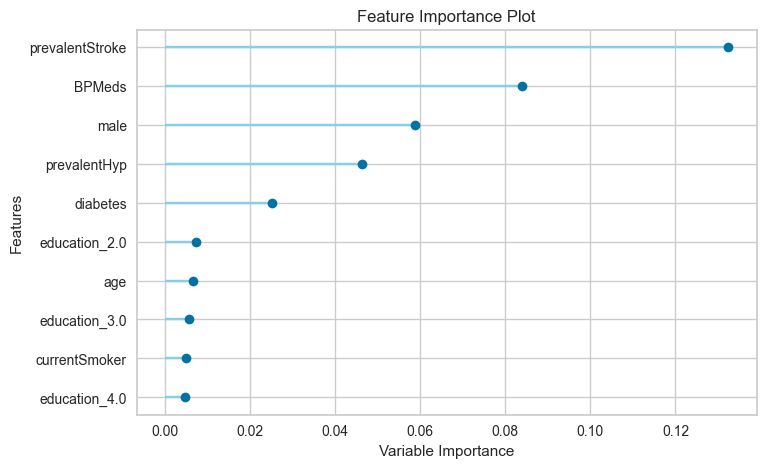

In [14]:
# plot feature importance
plot_model(best_model, plot = 'feature')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Ridge Regression,0.2359,0.1186,0.3443,0.1088,0.2400,0.7717


,Samples,MAE,MSE,RMSE,R2,RMSLE,MAPE
male,,,,,,,
0,724,0.201696,0.104553,0.323347,0.082849,0.22556,0.803974
1,548,0.281094,0.137103,0.370274,0.121221,0.257867,0.742763


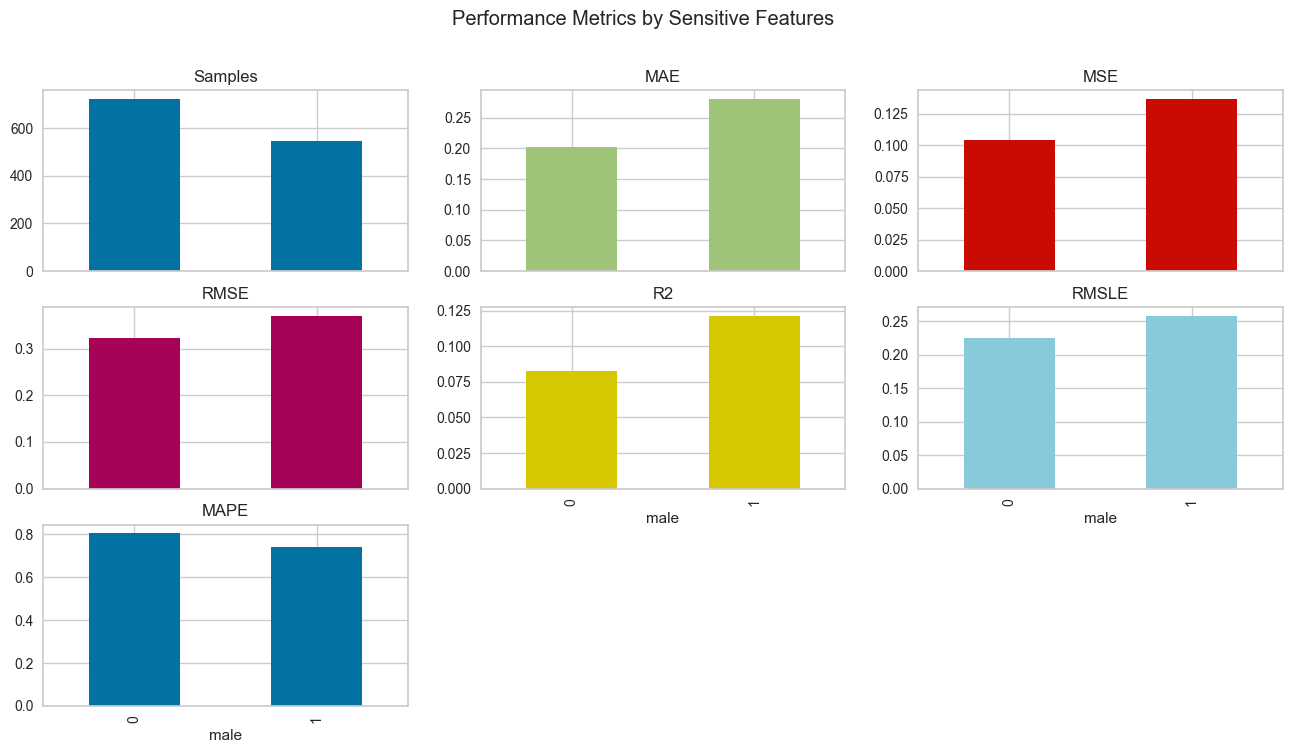

In [15]:
# check fairness
check_fairness(best_model, sensitive_features = ['male'])

In [16]:
# save model
save_model(best_model, 'my_Heart_Disease_Analysis_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['age', 'cigsPerDay', 'totChol',
                                              'sysBP', 'diaBP', 'BMI',
                                              'heartRate', 'glucose'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['male', 'education',
                                              'currentSmoker', 'BPMeds',
                                              'prevalentStroke', 'prevalentHyp',
                                              'diabetes'],
                                     transformer=...
                                                                         {'col': 'prevalentHyp',
                                                                          'data_type': dtype('float64'),
                                                         